### Today Objectives

* How to remove the outliers
* DataVisulization

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("Datasets\movie_metadata.csv")
df.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3565,Color,Caroline Link,73.0,141.0,11.0,8.0,Juliane Köhler,56.0,6173485.0,Biography|Drama,...,84.0,English,Germany,R,7000000.0,2001.0,36.0,7.7,2.35,802
727,Color,Peter Billingsley,166.0,113.0,0.0,721.0,Kristin Davis,4000.0,109176215.0,Comedy,...,144.0,English,USA,PG-13,60000000.0,2009.0,722.0,5.5,1.85,0
1657,Color,Frank Oz,63.0,102.0,0.0,413.0,Jim Belushi,13000.0,38747385.0,Comedy|Horror|Musical|Sci-Fi,...,165.0,English,USA,PG-13,25000000.0,1986.0,854.0,6.9,1.85,0
440,Color,Todd Phillips,383.0,102.0,480.0,461.0,Mason Lee,14000.0,254455986.0,Comedy,...,402.0,English,USA,R,80000000.0,2011.0,670.0,6.5,2.35,56000
2518,Color,Sidney J. Furie,94.0,134.0,22.0,488.0,Margot Kidder,1000.0,15681020.0,Action|Adventure|Family|Sci-Fi,...,259.0,English,UK,PG,17000000.0,1987.0,593.0,3.6,2.35,1000


In [2]:
# find the rows and columns
df.shape

(5043, 28)

In [3]:
# find the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
# find the datatypes of dataset
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [5]:
# get the only column names
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
# find the null values in dataset
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
# find the correlation
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


In [8]:
# find the describe of dataset
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [9]:
# remote the null values
df.dropna(inplace=True)

# df=df.dropna()

In [10]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

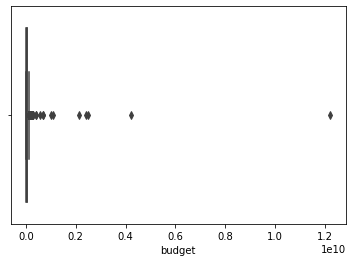

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.kdeplot(df['budget'])
#sns.boxenplot(df['budget'])
sns.boxplot(df['budget'])
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
ss=s.fit_transform(df[['budget']])
df['budget']=ss
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,0.844159,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,1.122944,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,0.879560,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,0.901686,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,0.962311,2012.0,632.0,6.6,2.35,24000


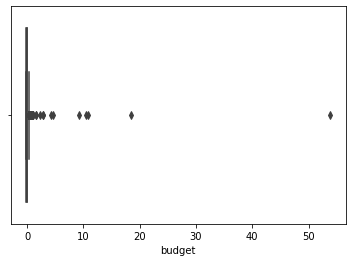

In [21]:
#sns.kdeplot(df['budget'])
#sns.boxenplot(df['budget'])
sns.boxplot(df['budget'])
plt.show()

In [22]:
# find the z-score
# z=(i-mean)/std
d=[1,2,2,2,2,3,1,1,1,29,1,2]
mean=np.mean(d)
std=np.std(d)
print("mean value is:",mean)
print("std value is:",std)

mean value is: 3.9166666666666665
std value is: 7.587910706438821


In [23]:
x=3
for i in d:
    z=(i-mean)/std
    if(z>x):
        print(i)

29


In [24]:
df=df.dropna()
df.shape

(3756, 28)

In [25]:
from scipy import stats
z=np.abs(stats.zscore(df['budget']))
z

array([0.84415869, 1.12294418, 0.87956003, ..., 0.20457478, 0.20457478,
       0.20460089])

In [26]:
z.mean()

0.18091224712589102

In [27]:
z.std()

0.9834992419111773

In [28]:
zz=pd.DataFrame(z)
zz.sample(5)

,0
895,0.016653
493,0.149408
2303,0.132033
3370,0.191330
956,0.016653


In [29]:
df['budget'][z<0.98]

0       0.844159
2       0.879560
3       0.901686
5       0.962311
6       0.937087
          ...   
5026   -0.204586
5027   -0.204562
5033   -0.204575
5035   -0.204575
5042   -0.204601
Name: budget, Length: 3742, dtype: float64

In [30]:
# outliers in budget column
df['budget'][z>0.98]

1        1.122944
1016     1.521209
1338     2.245308
2323    10.415794
2334     9.210024
2740     1.122944
2988    53.851015
3005    10.858310
3075     2.893011
3311     1.565461
3423     4.663077
3851     2.893011
3859    18.381093
4542     4.220561
Name: budget, dtype: float64

In [31]:
# drop the outliers from budget columns
dp=df['budget'][z>0.98]
df.drop(dp.index,inplace=True)

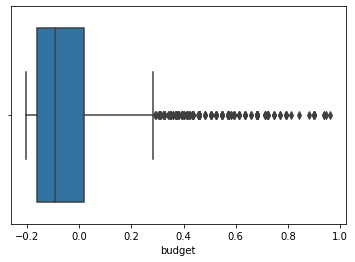

In [32]:
sns.boxplot(df['budget'])

### Data visulization

> Data visualiztion is a graphical reprasentation of data/information
> It is used for more data understanding, easy to analize, easy to get the information etc,
> It is more usefull for end users

* Matplotlib
* Seaborn


In [33]:
# Matplotlib is come from matlab
# Matplotlib is a data visulization library in python
# linear graph
# scatter plot
# box plot
# hist plot
# bar => vartical, horizontal
# Pie plot

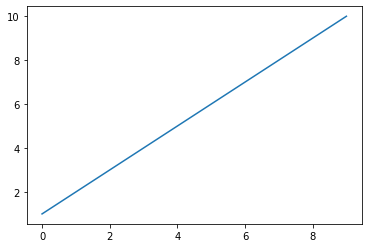

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
l=np.arange(1,11)
plt.plot(l)
plt.show()

In [36]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

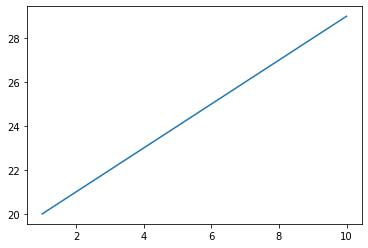

In [38]:
x=np.arange(1,11)
y=np.arange(20,30)
plt.plot(x,y)
plt.show()

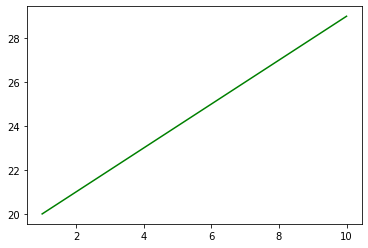

In [40]:
x=np.arange(1,11)
y=np.arange(20,30)
plt.plot(x,y,color='green')
plt.show()

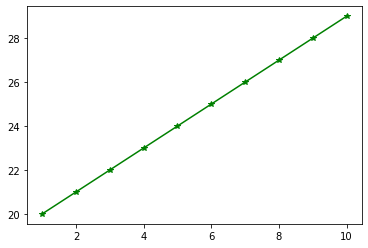

In [41]:
x=np.arange(1,11)
y=np.arange(20,30)
plt.plot(x,y,color='green',marker='*')
plt.show()

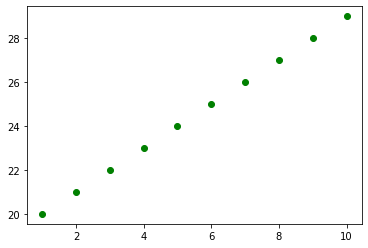

In [42]:
x=np.arange(1,11)
y=np.arange(20,30)
plt.plot(x,y,'go')
plt.show()

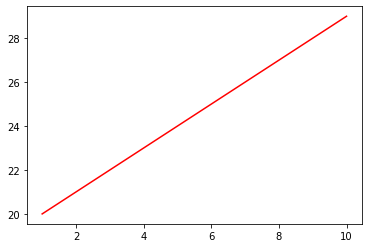

In [43]:
x=np.arange(1,11)
y=np.arange(20,30)
plt.plot(x,y,'g',color='red')
plt.show()

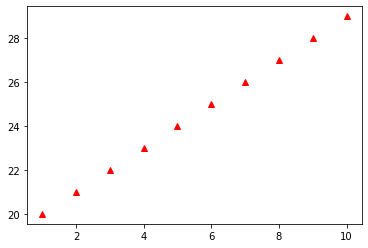

In [44]:
x=np.arange(1,11)
y=np.arange(20,30)
plt.plot(x,y,'go',color='red',marker='^')
plt.show()

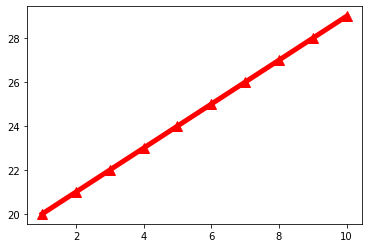

In [49]:
x=np.arange(1,11)
y=np.arange(20,30)
plt.plot(x,y,color='red',marker='^',linewidth=5, markersize=10)
plt.show()

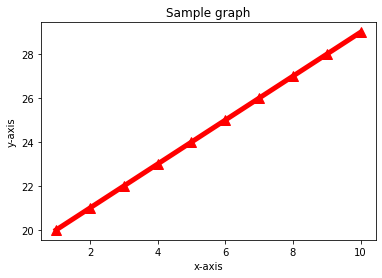

In [51]:
x=np.arange(1,11)
y=np.arange(20,30)
plt.plot(x,y,color='red',marker='^',linewidth=5, markersize=10)
plt.title("Sample graph")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()